<a href="https://colab.research.google.com/github/Devesh1602/Deep-Learning-BE/blob/main/Devesh_FASHION_MNIST_dataset_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images.shape


(60000, 28, 28)

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

<function matplotlib.pyplot.show(close=None, block=None)>

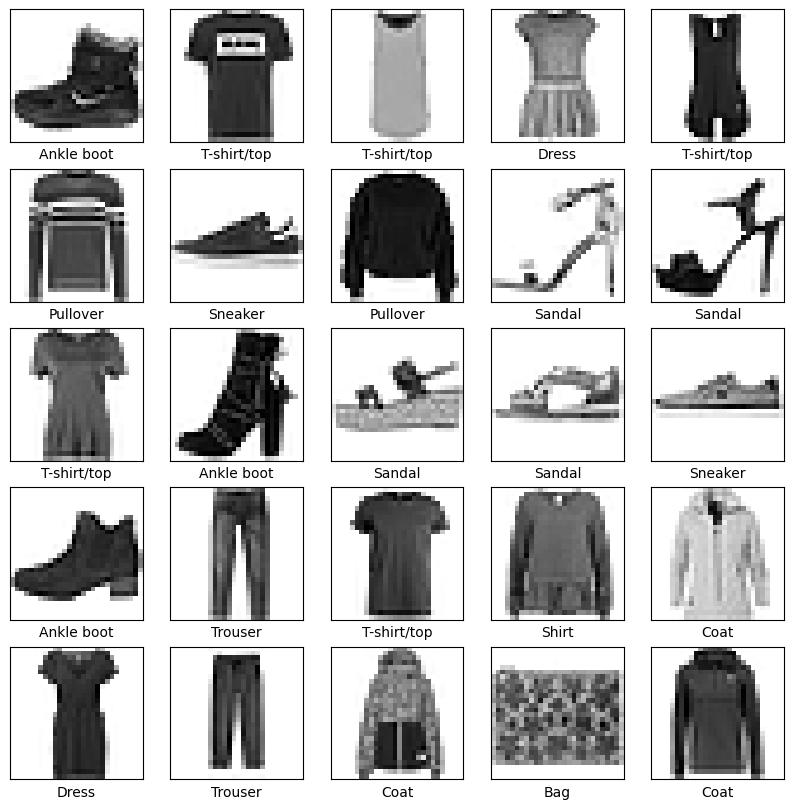

In [6]:
# Verify data is in correct format
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.fit(train_images, train_labels, epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4966 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3733 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3362 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3133 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2942 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2783 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2682 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2576 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2480 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("\n Test accuracy = ", test_acc)

313/313 - 1s - loss: 0.3475 - accuracy: 0.8787 - 648ms/epoch - 2ms/step

 Test accuracy =  0.8787000179290771


In [10]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


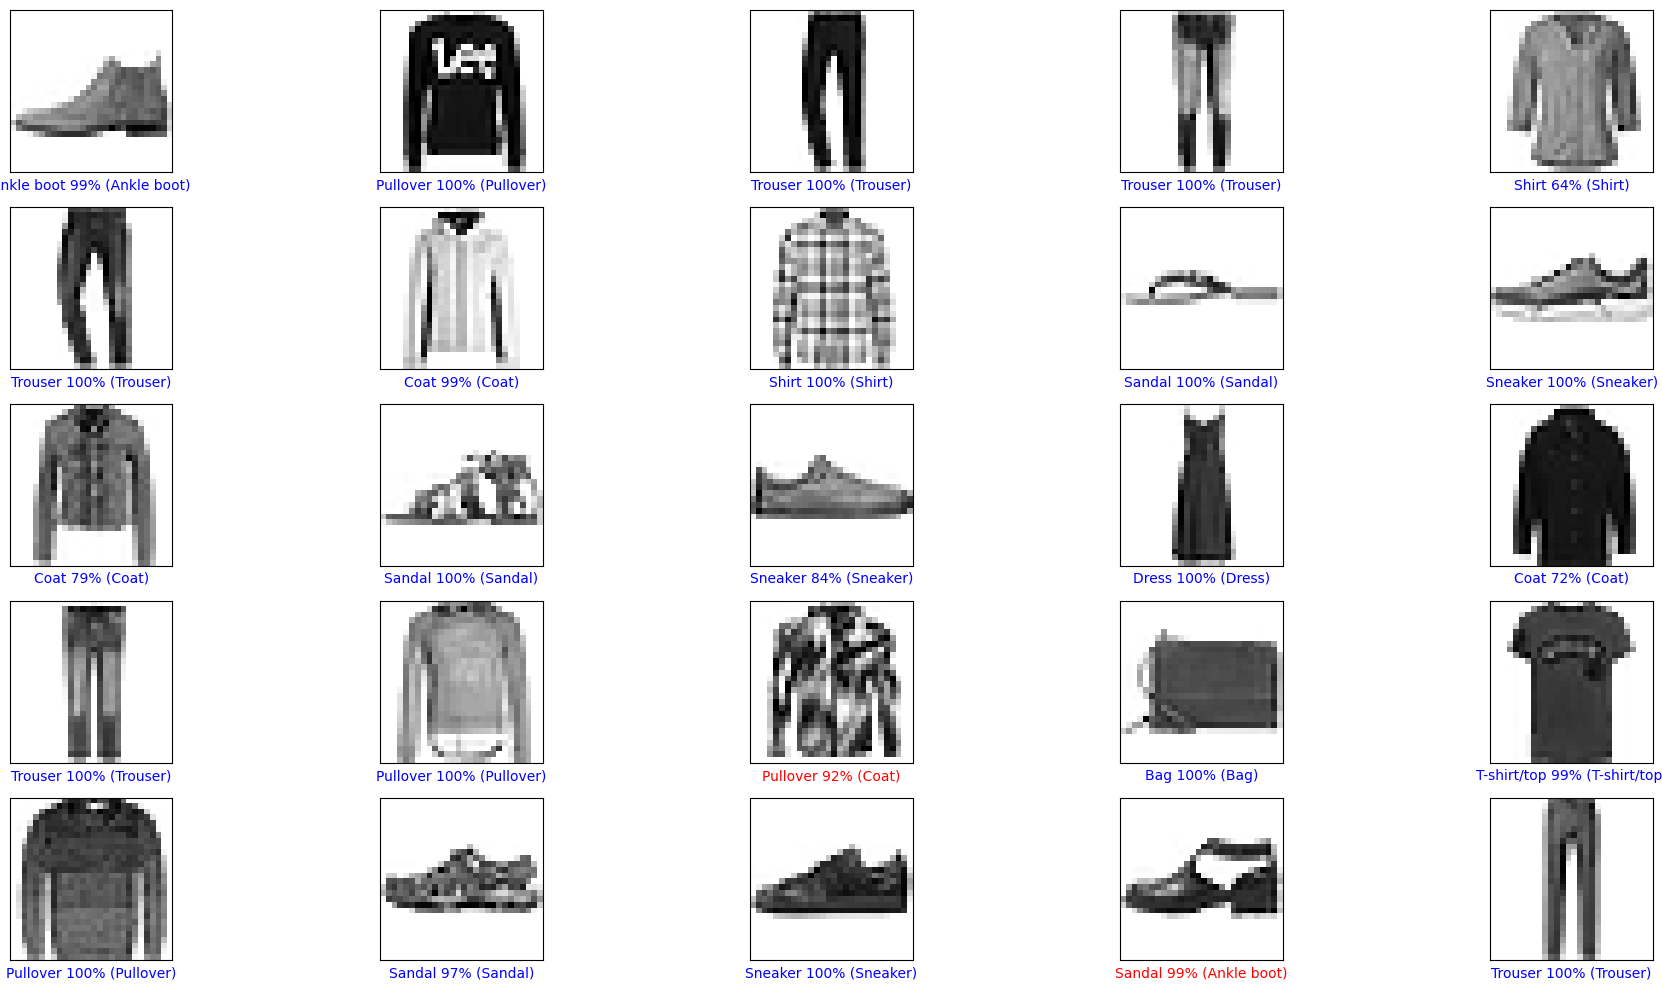

In [11]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


rows = 5
cols = 5
total_images = rows * cols
plt.figure(figsize = (2*2*cols, 2*rows))
for i in range(total_images):
  plt.subplot(rows, cols, i + 1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()